In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the movie reviews from IMDB website

url = "http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
resp = requests.get(url)
print(resp.status_code)
soup = BeautifulSoup(resp.text,"html.parser")


200


In [3]:
reviews = soup.findAll("div", attrs={"class","text"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [4]:
# Creating a data frame 
import pandas as pd
movie_reviews = pd.DataFrame(reviews, columns = ["reviews"])
movie_reviews.tail(5)

,reviews
20,"Maui was one of the best modern Disney movies,..."
21,This film is an epic in the truest sense and e...
22,"""Moana"" is the latest full length animated fil..."
23,"I read through so many reviews on this film, I..."
24,Moana (or Vaiana in my country and many other ...


In [5]:
movie_reviews.shape

(25, 1)

In [6]:
movie_reviews = [reviews.strip() for reviews in movie_reviews.reviews]

In [7]:
#Preprocessing the text
movie_reviews = [reviews for reviews in movie_reviews if reviews]           
# removing the empty strings from the data
movie_reviews[0:25]

['Instant classic.Easily ranks among the best from the Disney Studio, and a very worthy successor to Mulan 1998, a similar story equally well done.Oddly also seems to be best work ever from Dwayne Johnson, perhaps not the first name I would have associated with "voice acting," but a star turn nonetheless.If you want to be picky -- which is the reviewer\'s job, after all -- the momentum slows a little at the top of the third act, but the ultimate themes of redemption, forgiveness and self-discovery at the finale are an absolute joy.As they used to say, "for children of all ages."((Designated "IMDb Top Reviewer." Please check out my list "167+ Nearly-Perfect Movies (with the occasional Anime or TV miniseries) you can/should see again and again (1932 to the present))',
 'Despite being a lifelong Disney fan, that is not to say that everything they\'ve done is great. They\'ve done many classics, their best revolutionary, though they had hit and miss periods in the 80s and the 2000s.\'Enchan

In [8]:
# joining the list of comments into a single text/string

text = ' '.join(movie_reviews)

In [9]:
len(text)

40673

In [10]:
#Removing punctuations
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Instant classicEasily ranks among the best from the Disney Studio and a very worthy successor to Mulan 1998 a similar story equally well doneOddly also seems to be best work ever from Dwayne Johnson perhaps not the first name I would have associated with voice acting but a star turn nonethelessIf you want to be picky  which is the reviewers job after all  the momentum slows a little at the top of the third act but the ultimate themes of redemption forgiveness and selfdiscovery at the finale are an absolute joyAs they used to say for children of all agesDesignated IMDb Top Reviewer Please check out my list 167 NearlyPerfect Movies with the occasional Anime or TV miniseries you canshould see again and again 1932 to the present Despite being a lifelong Disney fan that is not to say that everything theyve done is great Theyve done many classics their best revolutionary though they had hit and miss periods in the 80s and the 2000sEnchanted and The Princess and the Frog saw a return to form

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [12]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Instant',
 'classicEasily',
 'ranks',
 'among',
 'the',
 'best',
 'from',
 'the',
 'Disney',
 'Studio',
 'and',
 'a',
 'very',
 'worthy',
 'successor',
 'to',
 'Mulan',
 '1998',
 'a',
 'similar',
 'story',
 'equally',
 'well',
 'doneOddly',
 'also']

In [13]:
len(tokens)

7050

In [14]:
#Removing Stopwords
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:25]

['Instant',
 'classicEasily',
 'ranks',
 'among',
 'best',
 'Disney',
 'Studio',
 'worthy',
 'successor',
 'Mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneOddly',
 'also',
 'seems',
 'best',
 'work',
 'ever',
 'Dwayne',
 'Johnson',
 'perhaps',
 'first']

In [15]:
#Normalizing the text(converting all the text to lower case)
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:25]

['instant',
 'classiceasily',
 'ranks',
 'among',
 'best',
 'disney',
 'studio',
 'worthy',
 'successor',
 'mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneoddly',
 'also',
 'seems',
 'best',
 'work',
 'ever',
 'dwayne',
 'johnson',
 'perhaps',
 'first']

In [16]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:25]

['instant',
 'classiceasili',
 'rank',
 'among',
 'best',
 'disney',
 'studio',
 'worthi',
 'successor',
 'mulan',
 '1998',
 'similar',
 'stori',
 'equal',
 'well',
 'doneoddli',
 'also',
 'seem',
 'best',
 'work',
 'ever',
 'dwayn',
 'johnson',
 'perhap',
 'first']

In [17]:
#Lemmatization
nlp = spacy.load("en_core_web_sm")


In [18]:
# joining the stopwords into a paragraph
doc = nlp(' '.join(no_stop_words))
doc[0:25]

Instant classicEasily ranks among best Disney Studio worthy successor Mulan 1998 similar story equally well doneOddly also seems best work ever Dwayne Johnson perhaps first

In [19]:
lemmas = [token.lemma_ for token in doc]
lemmas[:25]

['instant',
 'classiceasily',
 'rank',
 'among',
 'good',
 'Disney',
 'Studio',
 'worthy',
 'successor',
 'Mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneoddly',
 'also',
 'seem',
 'good',
 'work',
 'ever',
 'Dwayne',
 'Johnson',
 'perhaps',
 'first']

In [20]:
#POS tagging¶
one_block = movie_reviews[15]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [21]:
# getting the tokens and pos tags for the tokens
for tokens in doc_block[0:25]:
    print(tokens,tokens.pos_)

Moana PROPN
is AUX
elite ADJ
and CCONJ
poops VERB
on ADP
Frozen PROPN
from ADP
a DET
great ADJ
heightFight NOUN
me PRON
. PUNCT


In [22]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:25])

['poops', 'heightFight']


In [23]:
# getting the word count
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:24]

,words,count
0,poops,1
1,heightfight,1


<AxesSubplot:title={'center':'Nouns and Verbs'}, xlabel='words'>

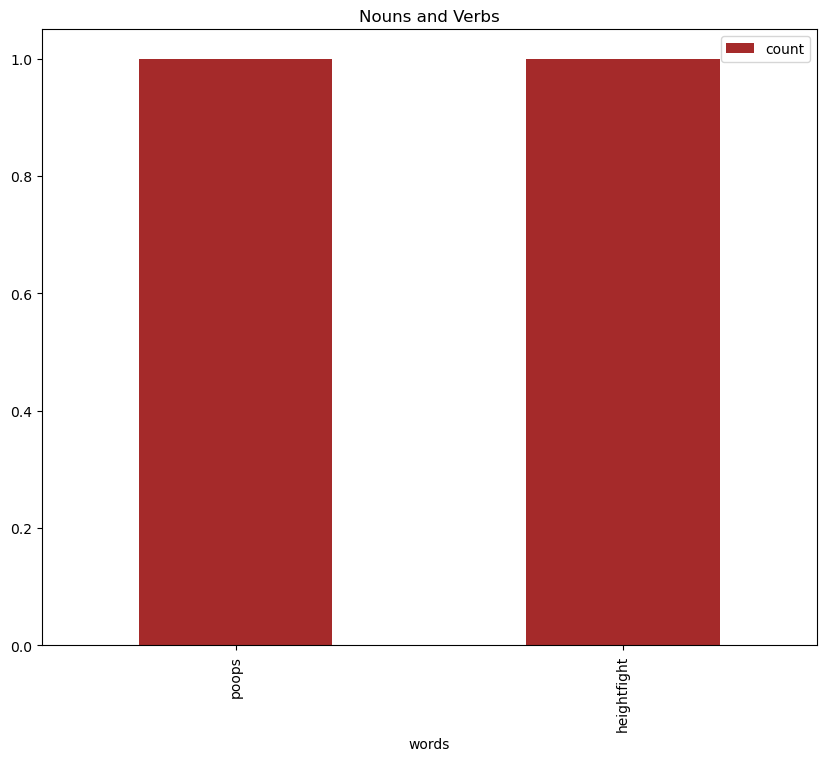

In [25]:
wf_df[0:24].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'brown')

In [26]:
#Sentiment Analysis
afinn = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass 11\sentiment\Afinn.csv', encoding='Latin1')
afinn.head(5)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
afinn.shape

(2477, 2)

In [28]:
from itertools import islice
def take(n,iterable):
    return list(islice(iterable, n))

In [29]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [30]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [31]:
from nltk import tokenize

In [32]:
sentence = tokenize.sent_tokenize(' '.join(movie_reviews))
sentence[0:25]

['Instant classic.Easily ranks among the best from the Disney Studio, and a very worthy successor to Mulan 1998, a similar story equally well done.Oddly also seems to be best work ever from Dwayne Johnson, perhaps not the first name I would have associated with "voice acting," but a star turn nonetheless.If you want to be picky -- which is the reviewer\'s job, after all -- the momentum slows a little at the top of the third act, but the ultimate themes of redemption, forgiveness and self-discovery at the finale are an absolute joy.As they used to say, "for children of all ages.',
 '"((Designated "IMDb Top Reviewer."',
 'Please check out my list "167+ Nearly-Perfect Movies (with the occasional Anime or TV miniseries) you can/should see again and again (1932 to the present)) Despite being a lifelong Disney fan, that is not to say that everything they\'ve done is great.',
 "They've done many classics, their best revolutionary, though they had hit and miss periods in the 80s and the 2000s.

In [33]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,Instant classic.Easily ranks among the best fr...
1,"""((Designated ""IMDb Top Reviewer."""
2,"Please check out my list ""167+ Nearly-Perfect ..."
3,"They've done many classics, their best revolut..."
4,'Enchanted' and 'The Princess and the Frog' sa...
...,...
326,"He brings such a fun, lovely, and comforting v..."
327,"And he is great at singing too, which was a su..."
328,"It also has great animation, with incredible v..."
329,"I truly believe that in this decade, Disney ha..."


In [34]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [35]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [36]:
calculate_sentiment("never poor")

-2

In [37]:
# Getting the word count from sentences
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(25)

0     102
1       4
2      42
3      20
4      40
5      63
6      25
7      34
8      46
9      71
10     17
11     27
12     16
13     18
14     22
15     17
16     26
17     11
18     61
19     79
20     17
21     33
22     20
23     55
24      9
Name: word_count, dtype: int64

In [38]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,Instant classic.Easily ranks among the best fr...,102,14
1,"""((Designated ""IMDb Top Reviewer.""",4,0
2,"Please check out my list ""167+ Nearly-Perfect ...",42,7
3,"They've done many classics, their best revolut...",20,1
4,'Enchanted' and 'The Princess and the Frog' sa...,40,3
...,...,...,...
326,"He brings such a fun, lovely, and comforting v...",18,9
327,"And he is great at singing too, which was a su...",13,3
328,"It also has great animation, with incredible v...",17,3
329,"I truly believe that in this decade, Disney ha...",26,0


In [39]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
326,"He brings such a fun, lovely, and comforting v...",18,9
126,"""Moana"" also has some good dialogue that keeps...",46,9
108,"In fact, I was astonished by its storyline alo...",67,9
161,"Moana has a great beginning, good middle, and ...",11,9
153,She is voiced by Auli'I Cravaljo and it fits l...,16,9
297,This film is an epic in the truest sense and e...,85,9
93,It won't be easy; life wasn't meant to be easy...,24,9
198,It won't be easy; life wasn't meant to be easy...,24,9
309,"I also loved her pet sidekick, as this chicken...",58,9
298,"Thinking back to the original Toy Story, thing...",85,10


In [40]:
sent_df['sentiment_scores'].describe()

count    331.000000
mean       2.123867
std        3.611397
min       -9.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       25.000000
Name: sentiment_scores, dtype: float64

In [41]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
94,"It has a superb single, a nice accompanying so...",24,16
199,"It has a superb single, a nice accompanying so...",24,16
296,"Maui was one of the best modern Disney movies,...",69,25


In [42]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
6,"It was however difficult to fault 'Moana', bec...",25,-1
7,There have been criticisms regarding a formula...,34,-9
16,"There is something for everybody, never too co...",26,-1
21,"If anybody does find him dumb or annoying, thi...",33,-7
38,It's no fluke that out of the four movies I ju...,38,-3
40,"Now, the world is slowly dying and someone mus...",19,-3
87,Just don't follow hard tradition all the time.,8,-1
95,"I admit, I was expecting too much from Moana a...",21,-1
115,"""All and all, I can't think of anything wrong ...",12,-2
119,"But it is also the story of friendship, forgiv...",28,-3


<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

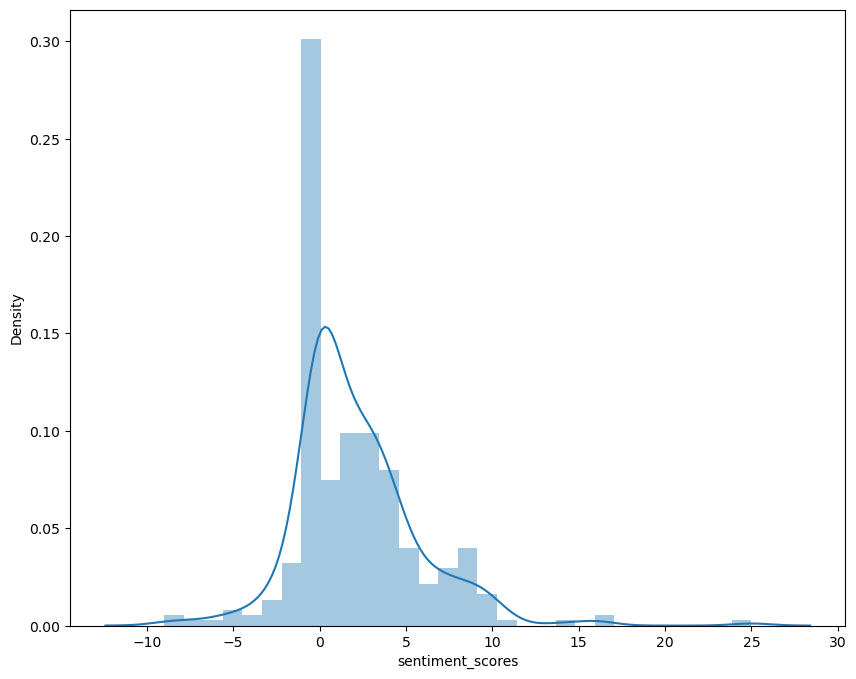

In [43]:
# Visualizing the sentiment scores
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

<AxesSubplot:ylabel='sentiment_scores'>

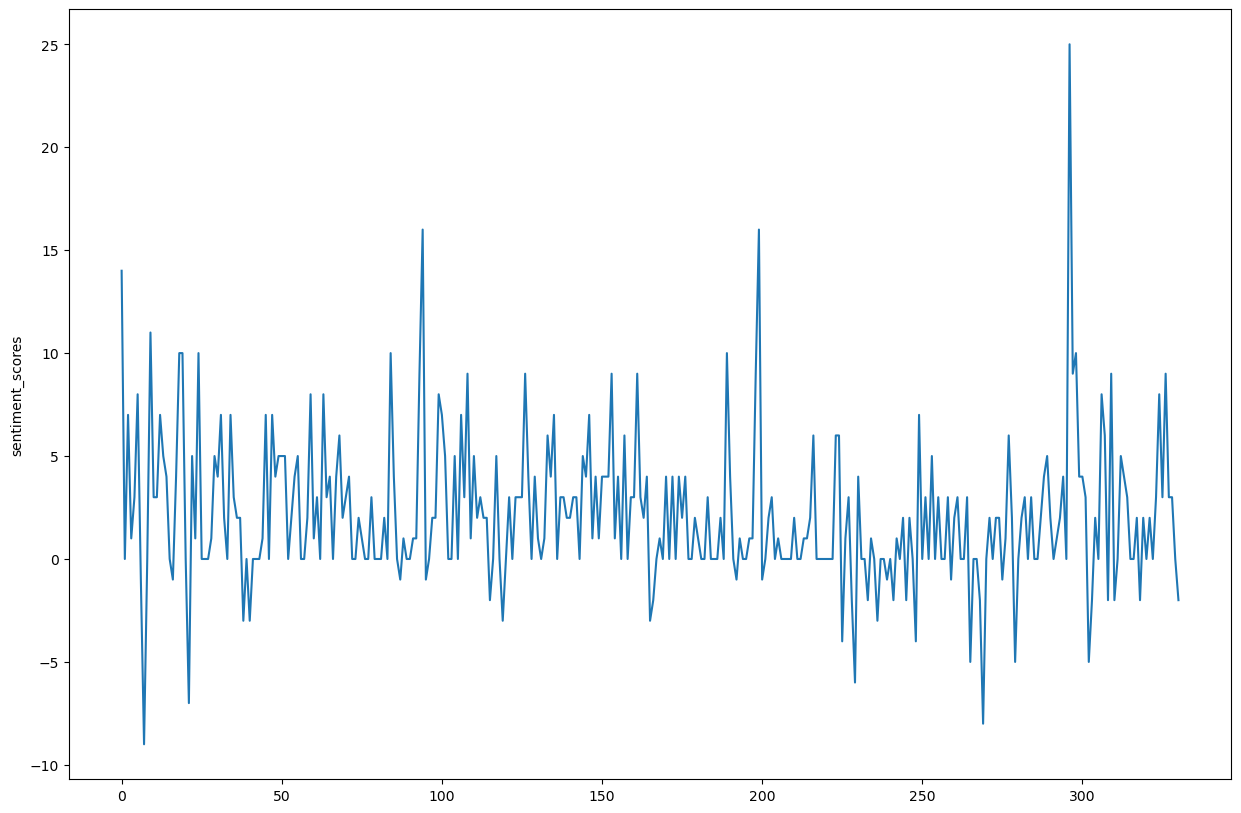

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

In [45]:
string = " ".join(sent_df["sentences"])

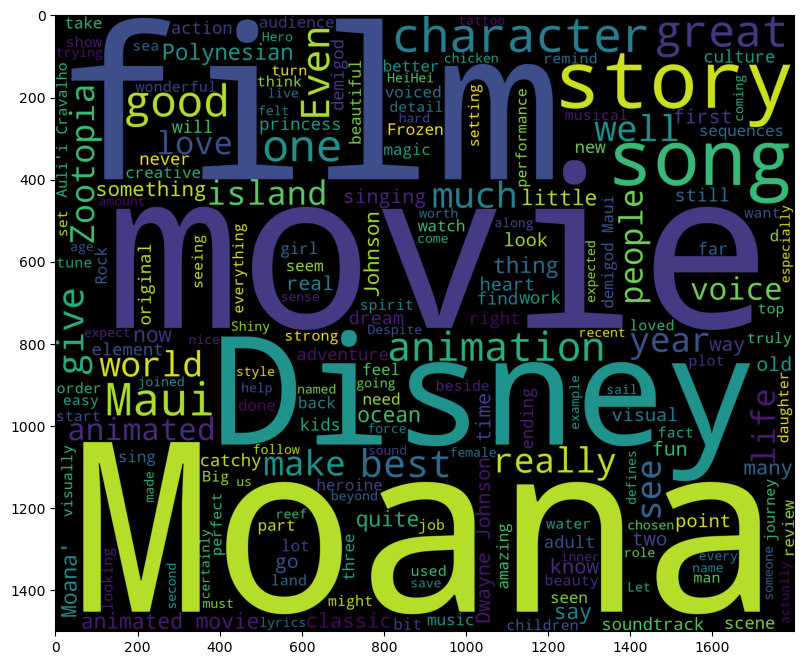

In [46]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)